# Course 5 Automatidata project (2nd notebook)

***

## Project Description

we will create and run a multiple linear regression (MLR) model to get the most accurate prediction. Because we want to predict ride duration based on multiple variables, including time of day and pickup and dropoff location, MLR will be our confirmation of how best to proceed with the ML algorithm in the final phase of the project. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import squarify

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# import researchpy as rp

import datetime
from datetime import datetime, timedelta, date

# import shap
# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict, RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor, plot_tree

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
import feature_engine
from feature_engine.outliers import Winsorizer, ArbitraryOutlierCapper, OutlierTrimmer
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures, SmartCorrelatedSelection

# This module lets us save our models once we fit them.
import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [ ]:
df = pd.read_csv("Yellow_Taxi_Trip_Data.csv", parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.dtypes.value_counts()

In [ ]:
# Descriptive Statistical Analysis
df.describe(include="all")

In [ ]:
df.columns

### Groupby Function

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>


In [ ]:
df.groupby(["RatecodeID"], as_index=False).mean()

In [ ]:
df.groupby(["payment_type"], as_index=False).mean()

In [ ]:
df.groupby(["PULocationID"], as_index=False).mean()

In [ ]:
df.groupby(["DOLocationID"], as_index=False).mean()

### Univariate Data Exploration

In [ ]:
df.hist(bins=50, figsize=(20,50), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
df.boxplot(figsize=(20,10), color='blue', fontsize=15, grid=False)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
# Create boxplot to visualize the outliers
### YOUR CODE HERE ###

plt.figure(figsize=(20,10))
g = sns.boxplot(data=df[["fare_amount","tip_amount","total_amount"]], showfliers=True, orient="h")
g.set_title("3 Variables with Outliers",fontsize=20)
plt.show()

In [ ]:
df['RatecodeID'].value_counts().to_frame()

In [ ]:
df['store_and_fwd_flag'].value_counts().to_frame()

In [ ]:
df['payment_type'].value_counts().to_frame()

## Data Cleaning


### Date/Time Feature Extraction

In [ ]:
df["tpep_pickup_datetime"].dtypes

In [ ]:
df["tpep_dropoff_datetime"].dtypes

In [ ]:
df["timediff"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df['minutes'] = df['timediff'].dt.total_seconds()/60

In [ ]:
df["minutes"].describe()

In [ ]:
df["minutes"] = abs(df["minutes"])

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(data=df.minutes)
plt.title("Trip Duration")
plt.show()

In [ ]:
df["minutes"].describe()

In [ ]:
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'timediff'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
#df.to_csv("taxitrip.csv", index=False)

### Count Encoding with Pandas

In [ ]:
countPU = df['PULocationID'].value_counts().to_dict()
countPU

In [ ]:
# Replace labels with counts
df['PULocationID'] = df['PULocationID'].map(countPU)

In [ ]:
countDO = df['DOLocationID'].value_counts().to_dict()
countDO

In [ ]:
# Replace labels with counts
df['DOLocationID'] = df['DOLocationID'].map(countDO)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df[["PULocationID", "DOLocationID"]].describe()

In [ ]:
#df.to_csv("taxitrip.csv", index=False)

In [2]:
df = pd.read_csv("taxitrip.csv")

In [3]:
df

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,minutes,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
0,6,3.34,469,406,13.00,0.00,0.50,2.76,0.00,0.30,16.56,14.07,1,0,0,0,0,0,0,0,0,0
1,1,1.80,792,285,16.00,0.00,0.50,4.00,0.00,0.30,20.80,26.00,0,0,0,0,0,0,0,0,0,0
2,1,1.00,259,802,6.50,0.00,0.50,1.45,0.00,0.30,8.75,7.20,0,0,0,0,0,0,0,0,0,0
3,1,3.70,4,31,20.50,0.00,0.50,6.39,0.00,0.30,27.69,31.00,1,0,0,0,0,0,0,0,0,0
4,1,4.37,60,59,16.50,0.50,0.50,0.00,0.00,0.30,17.80,16.72,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22661,3,0.61,741,653,4.00,1.00,0.50,0.00,0.00,0.30,5.80,3.27,1,0,0,0,0,0,0,1,0,0
22662,1,16.71,532,472,52.00,0.00,0.50,14.64,5.76,0.30,73.20,41.00,1,1,0,0,0,0,0,0,0,0
22663,1,0.42,590,661,4.50,0.00,0.50,0.00,0.00,0.30,5.30,4.00,1,0,0,0,0,0,0,1,0,0
22664,1,2.36,555,224,10.50,0.00,0.50,1.70,0.00,0.30,13.00,11.93,1,0,0,0,0,0,0,0,0,0


### One-hot encoding

In [ ]:
df.columns

In [ ]:
cat_col = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']

In [ ]:
df_cat = pd.get_dummies(data=df, columns=cat_col, drop_first=True)

In [ ]:
df_cat

In [ ]:
df = df_cat.copy()

In [ ]:
df

In [ ]:
#df.to_csv("taxitrip.csv", index=False)

### Remove unwanted data

From statistics, there were zero passengers, zero tips, negative fare paid which needs to be removed

In [ ]:
df["passenger_count"].value_counts(sort=True).to_frame().sort_index()

In [ ]:
df["trip_distance"].value_counts(sort=True).to_frame().sort_index()

In [18]:
df["fare_amount"].value_counts(sort=True).to_frame().sort_index()

,fare_amount
-120.00,1
-4.50,2
-4.00,2
-3.50,3
-3.00,2
...,...
140.00,1
150.00,1
152.00,1
200.01,1


In [ ]:
df["extra"].value_counts(sort=True).to_frame().sort_index()

In [ ]:
df["mta_tax"].value_counts(sort=True).to_frame().sort_index()

In [ ]:
df["tip_amount"].value_counts(sort=True).to_frame().sort_index()

In [ ]:
df["tolls_amount"].value_counts(sort=True).to_frame().sort_index()

In [ ]:
df["improvement_surcharge"].value_counts(sort=True).to_frame().sort_index()

In [ ]:
df["total_amount"].value_counts(sort=True).to_frame().sort_index()

In [ ]:
df["minutes"].value_counts(sort=True).to_frame().sort_index()

In [ ]:
sns.boxplot(data=df["passenger_count"], showfliers=True, orient="h")
plt.show()

In [ ]:
df[df['passenger_count'] == 0][:5]

In [ ]:
df2 = df[df['passenger_count'] != 0]

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2

In [ ]:
df = df2.copy()

In [ ]:
#df.to_csv("taxitrip.csv", index=False)

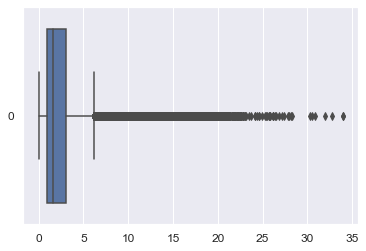

In [4]:
sns.boxplot(data=df["trip_distance"], showfliers=True, orient="h")
plt.show()

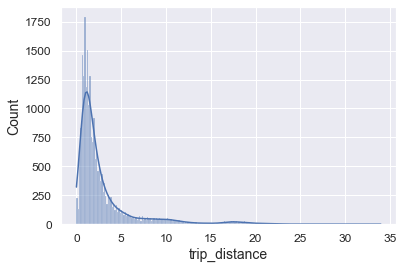

In [5]:
sns.histplot(kde=True, data=df.trip_distance)
plt.show()

In [13]:
df["trip_distance"].describe()

count   22519.00
mean        2.93
std         3.66
min         0.01
25%         1.00
50%         1.63
75%         3.09
max        33.96
Name: trip_distance, dtype: float64

In [7]:
df[df['trip_distance'] == 0][:5]

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,minutes,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
128,1,0.00,423,406,20.00,0.00,0.00,0.00,0.00,0.30,20.30,0.12,0,0,1,0,0,0,0,1,0,0
246,1,0.00,20,68,2.50,0.50,0.50,0.00,0.00,0.30,3.80,0.17,0,0,0,0,0,0,0,1,0,0
291,1,0.00,532,212,2.50,1.00,0.50,0.00,0.00,0.30,4.30,0.00,0,0,0,0,0,0,0,1,0,0
319,1,0.00,463,334,2.50,0.50,0.50,0.00,0.00,0.30,3.80,0.15,0,0,0,0,0,0,0,0,1,0
424,1,0.00,1,3,2.50,0.00,0.50,6.70,0.00,0.30,10.00,0.45,0,0,0,0,0,0,0,0,0,0


In [9]:
df2 = df[df['trip_distance'] != 0]

In [10]:
df2.reset_index(drop=True, inplace=True)

In [11]:
df2

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,minutes,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
0,6,3.34,469,406,13.00,0.00,0.50,2.76,0.00,0.30,16.56,14.07,1,0,0,0,0,0,0,0,0,0
1,1,1.80,792,285,16.00,0.00,0.50,4.00,0.00,0.30,20.80,26.00,0,0,0,0,0,0,0,0,0,0
2,1,1.00,259,802,6.50,0.00,0.50,1.45,0.00,0.30,8.75,7.20,0,0,0,0,0,0,0,0,0,0
3,1,3.70,4,31,20.50,0.00,0.50,6.39,0.00,0.30,27.69,31.00,1,0,0,0,0,0,0,0,0,0
4,1,4.37,60,59,16.50,0.50,0.50,0.00,0.00,0.30,17.80,16.72,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22514,3,0.61,741,653,4.00,1.00,0.50,0.00,0.00,0.30,5.80,3.27,1,0,0,0,0,0,0,1,0,0
22515,1,16.71,532,472,52.00,0.00,0.50,14.64,5.76,0.30,73.20,41.00,1,1,0,0,0,0,0,0,0,0
22516,1,0.42,590,661,4.50,0.00,0.50,0.00,0.00,0.30,5.30,4.00,1,0,0,0,0,0,0,1,0,0
22517,1,2.36,555,224,10.50,0.00,0.50,1.70,0.00,0.30,13.00,11.93,1,0,0,0,0,0,0,0,0,0


In [12]:
df = df2.copy()

In [14]:
#df.to_csv("taxitrip.csv", index=False)

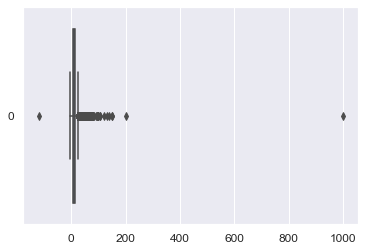

In [15]:
sns.boxplot(data=df["fare_amount"], showfliers=True, orient="h")
plt.show()

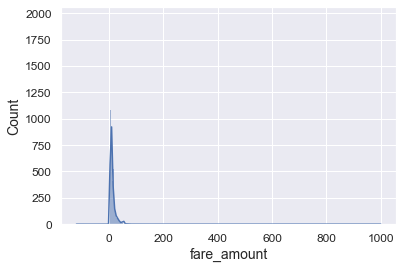

In [16]:
sns.histplot(kde=True, data=df.fare_amount)
plt.show()

In [24]:
(df['fare_amount'] == 0).value_counts()

False    22516
True         3
Name: fare_amount, dtype: int64

In [25]:
df2 = df[df['fare_amount'] != 0]

In [26]:
df2.reset_index(drop=True, inplace=True)

In [27]:
df2

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,minutes,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
0,6,3.34,469,406,13.00,0.00,0.50,2.76,0.00,0.30,16.56,14.07,1,0,0,0,0,0,0,0,0,0
1,1,1.80,792,285,16.00,0.00,0.50,4.00,0.00,0.30,20.80,26.00,0,0,0,0,0,0,0,0,0,0
2,1,1.00,259,802,6.50,0.00,0.50,1.45,0.00,0.30,8.75,7.20,0,0,0,0,0,0,0,0,0,0
3,1,3.70,4,31,20.50,0.00,0.50,6.39,0.00,0.30,27.69,31.00,1,0,0,0,0,0,0,0,0,0
4,1,4.37,60,59,16.50,0.50,0.50,0.00,0.00,0.30,17.80,16.72,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22511,3,0.61,741,653,4.00,1.00,0.50,0.00,0.00,0.30,5.80,3.27,1,0,0,0,0,0,0,1,0,0
22512,1,16.71,532,472,52.00,0.00,0.50,14.64,5.76,0.30,73.20,41.00,1,1,0,0,0,0,0,0,0,0
22513,1,0.42,590,661,4.50,0.00,0.50,0.00,0.00,0.30,5.30,4.00,1,0,0,0,0,0,0,1,0,0
22514,1,2.36,555,224,10.50,0.00,0.50,1.70,0.00,0.30,13.00,11.93,1,0,0,0,0,0,0,0,0,0


In [28]:
df = df2.copy()

In [29]:
#df.to_csv("taxitrip.csv", index=False)

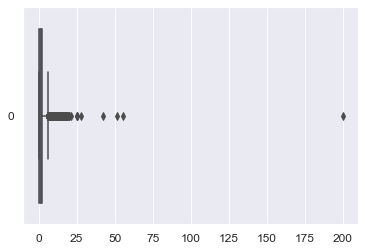

In [31]:
sns.boxplot(data=df["tip_amount"], showfliers=True, orient="h")
plt.show()

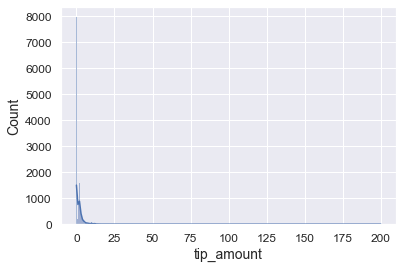

In [32]:
sns.histplot(kde=True, data=df.tip_amount)
plt.show()

In [33]:
(df['tip_amount'] == 0).value_counts()

False    14568
True      7948
Name: tip_amount, dtype: int64

In [34]:
df[df['tip_amount'] == 0][:5]

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,minutes,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
4,1,4.37,60,59,16.50,0.50,0.50,0.00,0.00,0.30,17.80,16.72,1,0,0,0,0,0,0,1,0,0
8,1,1.20,749,391,9.00,0.00,0.50,0.00,0.00,0.30,9.80,12.00,1,0,0,0,0,0,0,1,0,0
17,2,1.71,649,355,9.50,0.00,0.50,0.00,0.00,0.30,10.30,12.00,1,0,0,0,0,0,0,0,0,0
18,2,0.63,392,261,5.00,1.00,0.50,0.00,0.00,0.30,6.80,5.00,1,0,0,0,0,0,0,1,0,0
20,1,1.10,124,440,6.50,0.50,0.50,0.00,0.00,0.30,7.80,6.22,0,0,0,0,0,0,0,1,0,0


In [35]:
df2 = df[df['tip_amount'] != 0]

In [36]:
df2.reset_index(drop=True, inplace=True)

In [37]:
df2

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,minutes,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
0,6,3.34,469,406,13.00,0.00,0.50,2.76,0.00,0.30,16.56,14.07,1,0,0,0,0,0,0,0,0,0
1,1,1.80,792,285,16.00,0.00,0.50,4.00,0.00,0.30,20.80,26.00,0,0,0,0,0,0,0,0,0,0
2,1,1.00,259,802,6.50,0.00,0.50,1.45,0.00,0.30,8.75,7.20,0,0,0,0,0,0,0,0,0,0
3,1,3.70,4,31,20.50,0.00,0.50,6.39,0.00,0.30,27.69,31.00,1,0,0,0,0,0,0,0,0,0
4,6,2.30,861,802,9.00,0.50,0.50,2.06,0.00,0.30,12.36,8.00,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,1,5.70,483,39,19.00,0.50,0.50,4.05,0.00,0.30,24.35,18.02,0,0,0,0,0,0,0,0,0,0
14564,1,0.89,436,699,7.50,0.50,0.50,1.76,0.00,0.30,10.56,9.00,1,0,0,0,0,0,0,0,0,0
14565,1,16.71,532,472,52.00,0.00,0.50,14.64,5.76,0.30,73.20,41.00,1,1,0,0,0,0,0,0,0,0
14566,1,2.36,555,224,10.50,0.00,0.50,1.70,0.00,0.30,13.00,11.93,1,0,0,0,0,0,0,0,0,0


In [38]:
df = df2.copy()

In [39]:
#df.to_csv("taxitrip.csv", index=False)

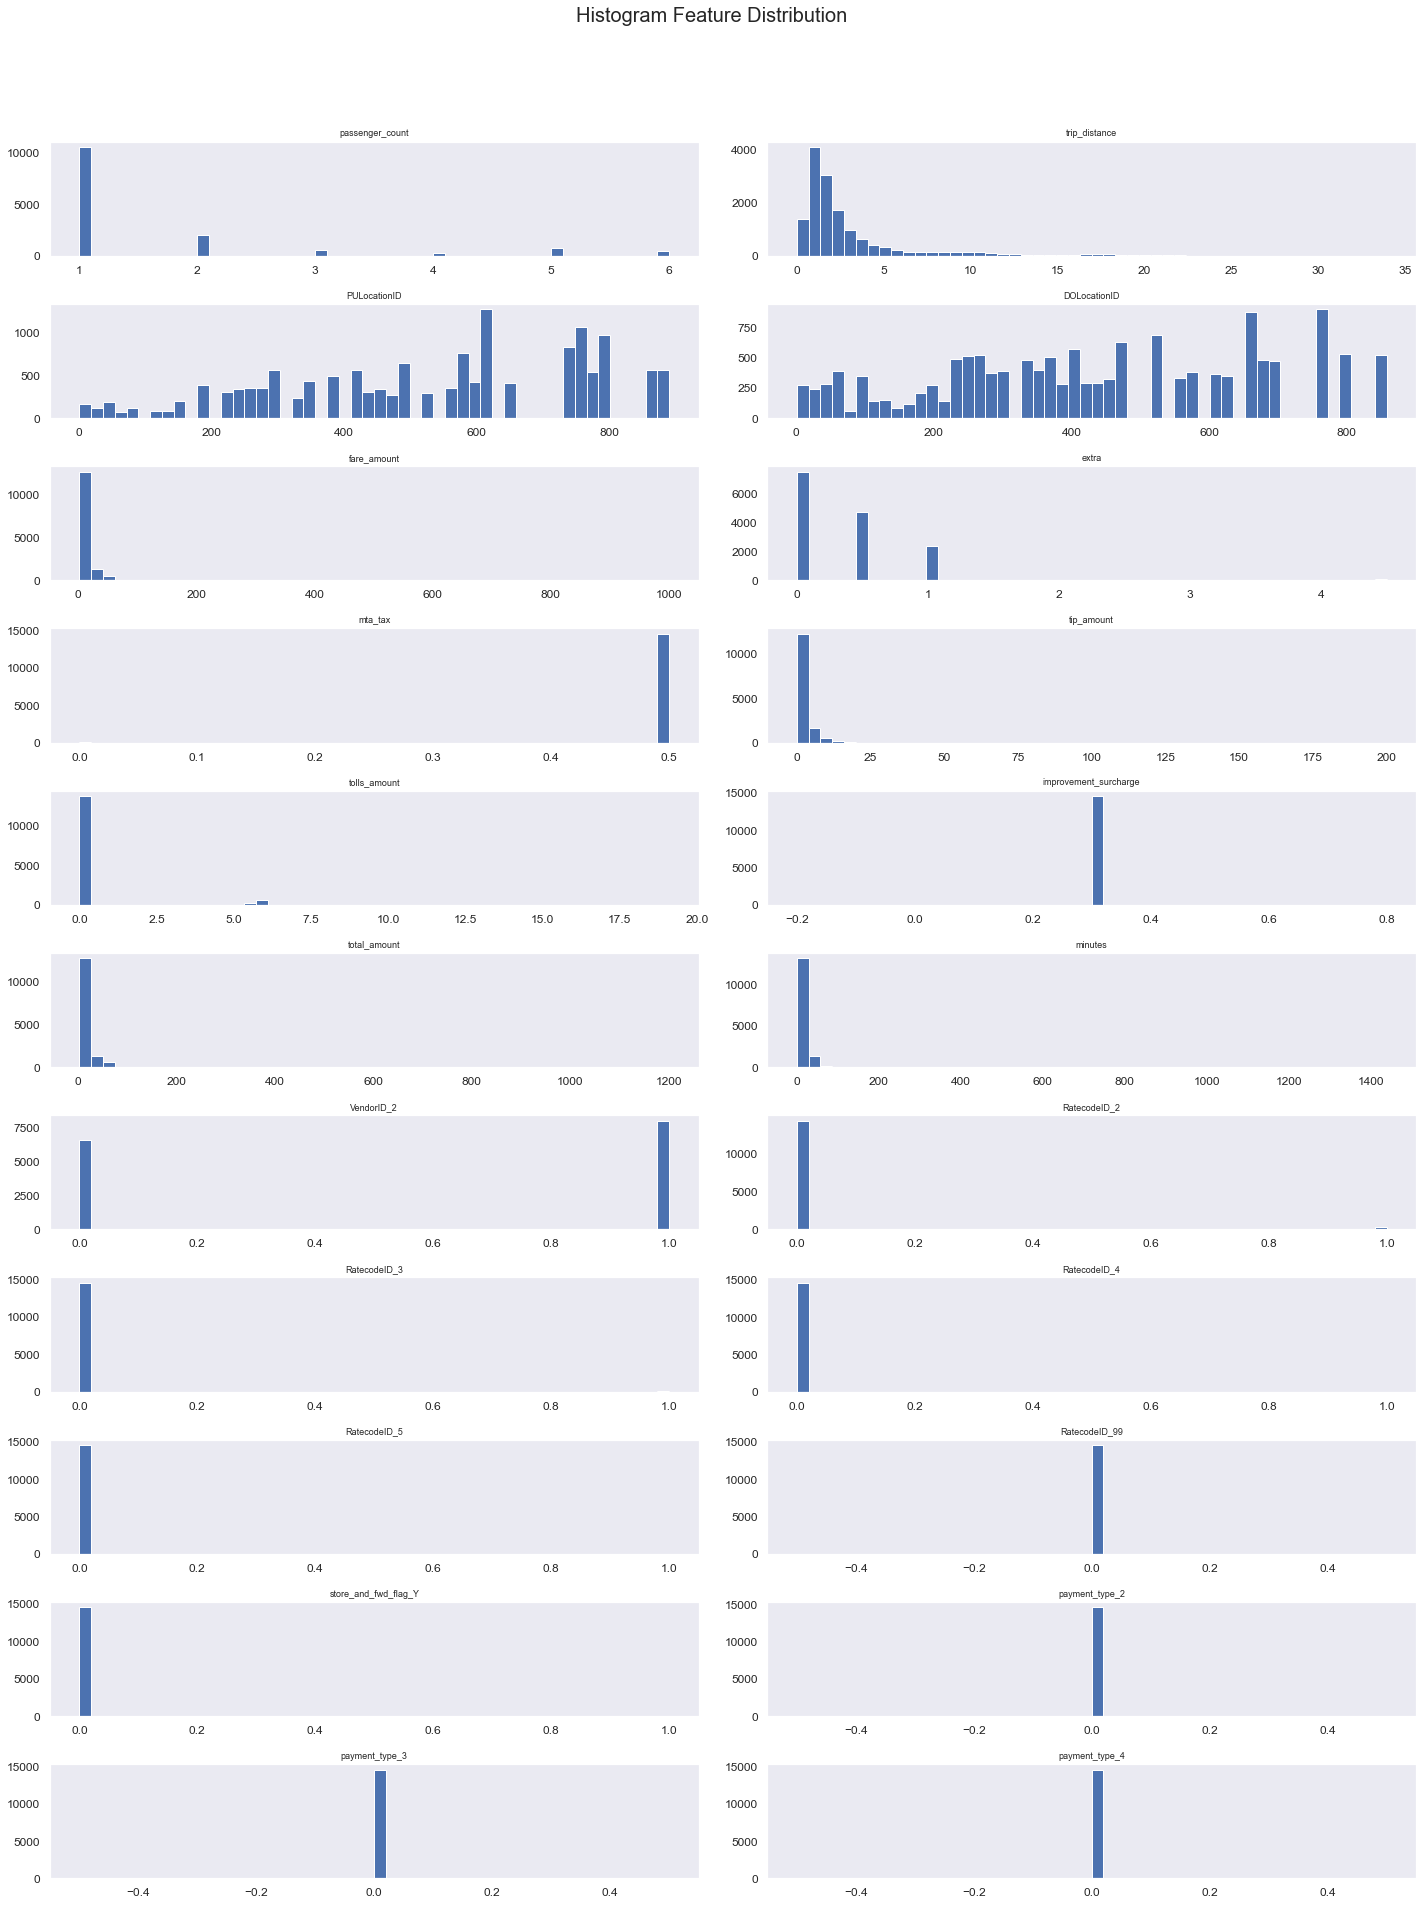

In [41]:
df.hist(bins=50, figsize=(20,50), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

### Treat Missing Values

<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

In [42]:
df.isnull().sum()

passenger_count          0
trip_distance            0
PULocationID             0
DOLocationID             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
minutes                  0
VendorID_2               0
RatecodeID_2             0
RatecodeID_3             0
RatecodeID_4             0
RatecodeID_5             0
RatecodeID_99            0
store_and_fwd_flag_Y     0
payment_type_2           0
payment_type_3           0
payment_type_4           0
dtype: int64

### Treat Duplicate Values

In [43]:
df.duplicated(keep='first').sum()

1

In [44]:
#Check duplicate values
df[df.duplicated(keep=False)].head()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,minutes,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
10706,1,0.60,576,661,5.00,0.00,0.50,1.15,0.00,0.30,6.95,5.00,0,0,0,0,0,0,0,0,0,0
10734,1,0.60,576,661,5.00,0.00,0.50,1.15,0.00,0.30,6.95,5.00,0,0,0,0,0,0,0,0,0,0


In [45]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [46]:
df

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,minutes,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
0,6,3.34,469,406,13.00,0.00,0.50,2.76,0.00,0.30,16.56,14.07,1,0,0,0,0,0,0,0,0,0
1,1,1.80,792,285,16.00,0.00,0.50,4.00,0.00,0.30,20.80,26.00,0,0,0,0,0,0,0,0,0,0
2,1,1.00,259,802,6.50,0.00,0.50,1.45,0.00,0.30,8.75,7.20,0,0,0,0,0,0,0,0,0,0
3,1,3.70,4,31,20.50,0.00,0.50,6.39,0.00,0.30,27.69,31.00,1,0,0,0,0,0,0,0,0,0
4,6,2.30,861,802,9.00,0.50,0.50,2.06,0.00,0.30,12.36,8.00,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14562,1,5.70,483,39,19.00,0.50,0.50,4.05,0.00,0.30,24.35,18.02,0,0,0,0,0,0,0,0,0,0
14563,1,0.89,436,699,7.50,0.50,0.50,1.76,0.00,0.30,10.56,9.00,1,0,0,0,0,0,0,0,0,0
14564,1,16.71,532,472,52.00,0.00,0.50,14.64,5.76,0.30,73.20,41.00,1,1,0,0,0,0,0,0,0,0
14565,1,2.36,555,224,10.50,0.00,0.50,1.70,0.00,0.30,13.00,11.93,1,0,0,0,0,0,0,0,0,0


In [47]:
#df.to_csv("taxitrip.csv", index=False)

### Capping / Censoring outliers

In [48]:
df.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,minutes,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4
count,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00,14567.00
mean,1.62,3.04,527.13,435.41,13.29,0.34,0.50,2.83,0.35,0.30,17.62,16.11,0.55,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.27,3.70,230.53,234.10,13.54,0.46,0.03,3.00,1.47,0.00,17.17,44.45,0.50,0.15,0.04,0.01,0.04,0.00,0.06,0.00,0.00,0.00
min,1.00,0.01,1.00,1.00,2.50,0.00,0.00,0.01,0.00,0.30,3.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.03,342.00,249.00,7.00,0.00,0.50,1.45,0.00,0.30,9.36,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.70,576.00,427.00,9.50,0.00,0.50,2.00,0.00,0.30,12.95,11.63,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,3.20,749.00,653.00,15.00,0.50,0.50,3.08,0.00,0.30,19.12,18.83,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,6.00,33.92,890.00,858.00,999.99,4.50,0.50,200.00,19.10,0.30,1200.29,1438.58,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00


In [ ]:
sns.boxplot(data=df["fare_amount"], showfliers=True, orient="h")
plt.show()

In [ ]:
df[df["fare_amount"] > 200]

In [ ]:
df[df["fare_amount"] < 0]

In [ ]:
capper1 = ArbitraryOutlierCapper(
            max_capping_dict={'fare_amount' : 200},
            min_capping_dict={'fare_amount' : 0}
            )

In [ ]:
capper1.fit(df)

In [ ]:
df2 = capper1.transform(df)

In [ ]:
df2["fare_amount"].describe()

In [ ]:
sns.boxplot(data=df2["fare_amount"], showfliers=True, orient="h")
plt.show()

In [ ]:
sns.boxplot(data=df2["trip_distance"], showfliers=True, orient="h")
plt.show()

In [ ]:
df2[df2["trip_distance"] > 30]

In [ ]:
df.to_csv("taxitrip.csv", index=False)

# Data Visualization

In [ ]:
df = pd.read_csv("taxitrip.csv")

In [ ]:
df.head()

In [ ]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Main Title')

sns.barplot(x="passenger_count", y="duration", data=df, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Passenger Count")
ax[0].set_ylabel("")

sns.barplot(x="pay_Cash", y="duration", data=df, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("Cash")
ax[1].set_ylabel("duration")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
#fig.suptitle('Main Title')

sns.barplot(x="pay_Disp", y="duration", data=df, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Disp")
ax[0].set_ylabel("Duration")

sns.barplot(x="pay_NoC", y="duration", data=df, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("No Cash")
ax[1].set_ylabel("duration")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df[df["passenger_count"] == 0][:5]

In [ ]:
# Plot 1 rows and 2 columns (can be expanded)
line_color = {'color': 'red'}
fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Regression Plots')

sns.regplot(x=df.trip_distance, y=df.duration, data=df, ax=ax[0], ci=None, line_kws=line_color)
#ax[0].set_title('title')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("trip_distance")
ax[0].set_ylabel("duration")

sns.regplot(x=df.fare_amount, y=df.duration, data=df, ax=ax[1], ci=None, line_kws=line_color)
#ax[1].set_title('title')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("fare_amount")
ax[1].set_ylabel("duration")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,10))
#fig.suptitle('Main Title', y=0.5)

sns.boxplot(x="PULocationID", data=df, ax=ax1)
ax1.set_title('PULocationID', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.boxplot(x="DOLocationID", data=df, ax=ax2)
ax2.set_title('DOLocationID', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("")
ax2.set_ylabel("")

sns.boxplot(x="fare_amount", data=df, ax=ax3)
ax3.set_title('fare_amount', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("")
ax3.set_ylabel("")

sns.boxplot(x="tip_amount", data=df, ax=ax4)
ax4.set_title('tip_amount', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

## Scatter Plots

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

In [ ]:
fig = plt.figure(figsize=(20,40))

plt.subplot(4,2,1)
plt.title("", size=20)
sns.scatterplot(x="disp", y="mpg", data=df, color='darkblue', s=200)
plt.xlabel("")
plt.ylabel("")
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(4,2,2)
plt.title("", size=20)
sns.scatterplot(x="hp", y="mpg", data=df, color='darkblue', s=200)
plt.xlabel("")
plt.ylabel("")
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(4,2,3)
plt.title("", size=20)
sns.scatterplot(x="qsec", y="mpg", data=df, color='darkblue', s=200)
plt.xlabel("")
plt.ylabel("")
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(4,2,4)
plt.title("", size=20)
sns.scatterplot(x="qsec", y="mpg", data=df, color='darkblue', s=200)
plt.xlabel("")
plt.ylabel("")
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## Pairplots

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(500), height=4)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(data=df.sample(n=500), x_vars=['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount'], y_vars=df.duration, height=4)
plt.show()

## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [ ]:
df.corr()

In [ ]:
df.corr()["duration"].sort_values()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

## Feature Selection

In practice, feature selection should be done after data pre-processing,
so ideally, all the categorical variables are encoded into numbers,
and then you can assess how deterministic they are of the target

In [ ]:
dfsel = df[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
            'tolls_amount', 'improvement_surcharge', 'total_amount']]

In [ ]:
dfsel.head()

In [ ]:
dfsel.shape

In [ ]:
X = dfsel.iloc[:,0:9]

In [ ]:
X.values

In [ ]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.95)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', DropCorrelatedFeatures(threshold=0.8, method='pearson')),
])


In [ ]:
pipe.fit(X)

In [ ]:
X.shape

In [ ]:
pipe.transform(X)

### Create Train, Validation and Test Dataset

When you split the data set into three splits, what we get is the test data set. The three splits consist of training data set, validation data set and test data set. You train the model using the training data set and assess the model performance using the validation data set. You optimize the model performance using training and validation data set. Finally, you test the model generalization performance using the test data set. The test data set remains hidden during the model training and model performance evaluation stage. One can split the data into a 70:20:10 ratio. 10% of the data set can be set aside as test data for testing the model performance. 

In [ ]:
df.shape

In [ ]:
trainset = df2[0:14000]

In [ ]:
trainset

In [ ]:
testset = df2[14000:]

In [ ]:
testset

In [ ]:
trainset.to_csv("train.csv", index=False)

In [ ]:
testset.to_csv("test.csv", index=False)

In [ ]:
testset.drop(['left'], axis=1, inplace=True)

In [ ]:
testset.head()

In [ ]:
testset.to_csv("test2.csv", index=False)

In [ ]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

## Regression Model

## Multiple Linear Regression (StatsModel)

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets `[[]]`, and listing the names of the columns of interest.

In [ ]:
df.columns

In [ ]:
y = df[['duration']]
X = df[['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 
        'tip_amount', 'pay_Cash', 'pay_Disp', 'pay_NoC']]

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

Lastly, you can build the simple linear regression model in `statsmodels` using the `ols()` function. You can import the `ols()` function directly using the line of code below.

Then, you can plug in the `ols_formula` and `ols_data` as arguments in the `ols()` function. After you save the results as a variable, you can call on the `fit()` function to actually fit the model to the data.

First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (`~`), and then each of the X variables separated by a plus sign (`+`). We can use `C()` to indicate a categorical variable. This will tell the `ols()` function to one hot encode those variables in the model. Please review the previous course materials as needed to review how and why we code categorical variables for regression.

In [ ]:
# Write out OLS formula as a string
ols_formula = "duration ~ trip_distance + PULocationID + DOLocationID + fare_amount + \
                tip_amount + C(pay_Cash) + C(pay_Disp) + C(pay_NoC)"

In [ ]:
linreg = smf.ols(ols_formula, data=df).fit()

In [ ]:
linreg.summary()

## Model evaluation and interpretation

Lastly, you can call the `summary()` function on the `model` object to get the coefficients and more statistics about the model. The output from `model.summary()` can be used to evaluate the model and interpret the results. Later in this section, we will go over how to read the results of the model output.

Use the `.summary()` function to get a summary table of model results and statistics.

Once we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. We'll focus on `R-squared`, which tells us how much variation in body mass (g) is explained by the model. An `R-squared` of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

Turning to the lower half of the table, we get the beta coefficients estimated by the model and their corresponding 95% confidence intervals and p-values. Based on the p-value column, labeled `P>|t|`, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linreg, 'trip_distance', fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(linreg, "tip_amount")
fig.tight_layout(pad=1.0)
plt.show()

## Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected above with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

In [ ]:
# Calculate the residuals.

### YOUR CODE HERE ### 

residuals = linreg.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

In [ ]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 

fig = sns.scatterplot(x = linreg.fittedvalues, y = linreg.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot.
plt.show()

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

In [ ]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(df.sample(300))

In [ ]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 

# Create a subset of the data with the continous independent variables. 
X = df[['fare_amount', 'tip_amount']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

VIF between 1 and 5 = variables are moderately correlated

***

***

## Multiple Linear Regression (SK Learn)

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$

The equation is given by:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
X = df.iloc[:,0:9]
y = df.iloc[:,9]

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr_pred = lr.predict(X_test)
lr_pred

In [ ]:
lr.intercept_

In [ ]:
lr.coef_

In [ ]:
mse = mean_squared_error(y_test,lr_pred)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
r2score = r2_score(y_test,lr_pred)
r2score

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

## K Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation, as shown in the Diagram below. In this case, we would use K-1 (or 4 folds) for testing a 1 fold for training. K-fold is also used for hyper-parameters selection that we will discuss later.

<img src="k-fold.png">

In many cases, we would like to train models that are not available in Scikit-learn or are too large to fit in the memory. We can create a `KFold` object that  Provides train/test indices to split data into train/test sets in an iterative manner.

`n_splits`:  A number of folds. Must be at least 2. Changed in version 0.22: n_splits default value changed from 3 to 5.

`shuffle`: Indicates whether to shuffle the data before splitting into batches. Note, the samples within each split will not be shuffled.

`random_state`: the random state.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
lr_pred = cross_val_predict(lr, X, y, cv=kf, n_jobs=-1)

In [ ]:
r2_score(y, lr_pred)

## Cross Validation Score

Now, let's use *Scikit-Learn's* *K-fold cross-validation* method to see whether we can assess the performance of our model. The *K-fold cross-validation* method splits the training set into the number of folds (n_splits), as now in the Diagram above, if we have K folds, K-1 is used for training and one fold is used for testing. The input parameters are as follows:

<b>estimator</b>: The object to use to `fit` the data.

<b>X</b>: array-like of shape (n_samples, n_features). The data to fit. Can be for example a list, or an array.

<b>y</b>: array-like of shape (n_samples,) or (n_samples, n_outputs), default=None. The target variable to try to predict in the case of supervised learning.

<b>scoring</b>: A str or a scorer callable object/ function with signature scorer (estimator, X, y) which should return only a single value.  See model evaluation [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01#scoring-parameter) for more information.

The larger the fold, the better the model performance is, as we are using more samples for training; the variance also decreases.


In [ ]:
cv = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)

In [ ]:
cv = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='r2', cv=5)

In [ ]:
cv.mean()

In [ ]:
cv.std()

In [ ]:
-1 * cv

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

In [ ]:
lr_pred_cv = cross_val_predict(estimator=lr, X=X_train[["disp"]], y=y_train, cv=5)

In [ ]:
lr_pred_cv [0:5]

## Ridge Regression

In [ ]:
rd = Ridge(alpha=1.0, random_state=0)

In [ ]:
rd.fit(X_train,y_train)

In [ ]:
rd_pred = rd.predict(X_test)

In [ ]:
rd_pred[0:5]

In [ ]:
y_test[0:5]

### Perform GridSearchCV

In [ ]:
parameters= [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters

In [ ]:
gs = GridSearchCV(estimator=rd, param_grid=parameters, n_jobs=-1, cv=5)

In [ ]:
gs.fit(X_train,y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_estimator_.score(X_test,y_test)

In [ ]:
rd2 = Ridge(alpha=100000, random_state=0)

In [ ]:
rd2.fit(X_train,y_train)

In [ ]:
rd2_pred = rd2.predict(X_test)

In [ ]:
rd2_pred[0:5]

In [ ]:
rd2.intercept_

In [ ]:
rd2.coef_

In [ ]:
mse = mean_squared_error(y_test,rd2_pred)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
r2score = r2_score(y_test,rd2_pred)
r2score

In [ ]:
rd2.score(X_train, y_train)

In [ ]:
rd2.score(X_test, y_test)

# Extra Tree Regressor

In [ ]:
et = ExtraTreeRegressor(random_state=0)

In [ ]:
et.fit(X_train,y_train)

In [ ]:
et_pred = et.predict(X_test)

et_pred

In [ ]:
mse = mean_squared_error(y_test,et_pred)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
r2score = r2_score(y_test,et_pred)
r2score

In [ ]:
et.score(X_train, y_train)

In [ ]:
et.score(X_test, y_test)

### Compare models

Create a table of results to compare model performance.

In [ ]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###

table = pd.DataFrame()
table = table.append({'Model': "Linear Regression",
                        'MAE':  "N/A",
                        'MSE': 0.935863,
                        'RMSE': 0.955197,
                        'R2': 0.940864
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Ridge Regression",
                        'MAE':  "N/A",
                        'MSE': 0.944501,
                        'RMSE': 0.950128,
                        'R2': 0.942450
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Extra Trees",
                        'MAE':  "N/A",
                        'MSE': "N/A",
                        'RMSE': "N/A",
                        'R2': "N/A"
                      },
                        ignore_index=True
                    )

table

## Pickle  

When models take a long time to fit, you don’t want to have to fit them more than once. If your kernel disconnects or you shut down the notebook and lose the cell’s output, you’ll have to refit the model, which can be frustrating and time-consuming. 

`pickle` is a tool that saves the fit model object to a specified location, then quickly reads it back in. It also allows you to use models that were fit somewhere else, without having to train them yourself.

In [ ]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

This step will ***W***rite (i.e., save) the model, in ***B***inary (hence, `wb`), to the folder designated by the above path. In this case, the name of the file we're writing is `rf_cv_model.pickle`.

In [ ]:
# Pickle the model
with open(path+'rf_val_model.pickle', 'wb') as to_write:
    pickle.dump(rf_val, to_write)

Once we save the model, we'll never have to re-fit it when we run this notebook. Ideally, we could open the notebook, select "Run all," and the cells would run successfully all the way to the end without any model retraining. 

For this to happen, we'll need to return to the cell where we defined our grid search and comment out the line where we fit the model. Otherwise, when we re-run the notebook, it would refit the model. 

Similarly, we'll also need to go back to where we saved the model as a pickle and comment out those lines.  

Next, we'll add a new cell that reads in the saved model from the folder we already specified. For this, we'll use `rb` (read binary) and be sure to assign the model to the same variable name as we used above, `rf_cv`.

In [ ]:
# Open pickled model
with open(path+'rf_val_model.pickle', 'rb') as to_read:
    rf_val = pickle.load(to_read)

#### Python code done by Dennis Lam